# ADVANCED LEVEL TASK: HANDWRITTEN DIGIT RECOGNITION
# Description: Develop a convolutional neural network (CNN) to classify images of handwritten digits from the MNIST dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [36]:
# Load the MNIST dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [37]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [41]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [42]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [43]:
# Preprocess the MNIST dataset
print(f"Training Data Size: {train_data.shape} \nTest Data Size: {test_data.shape}")
X_train = train_data.drop(columns=['label'], axis=1)
Y_train = train_data['label']
X_test = test_data

Training Data Size: (42000, 785) 
Test Data Size: (28000, 784)


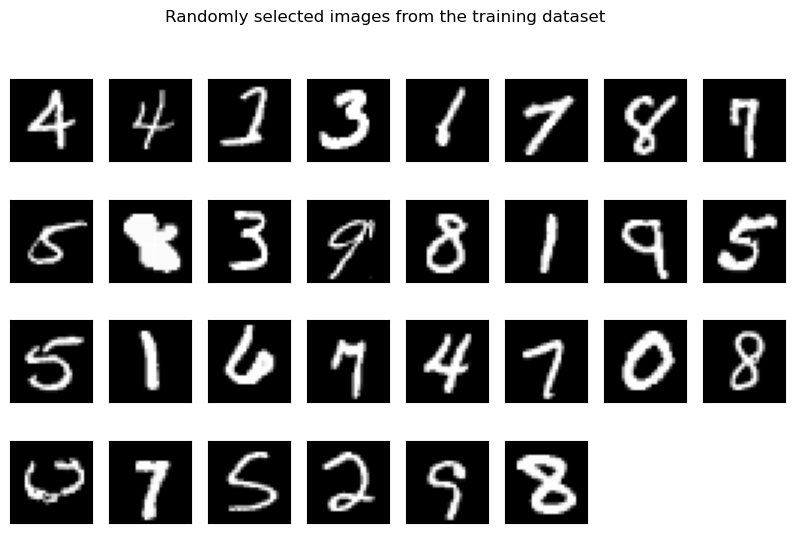

In [44]:
# Display some random images from the training dataset
num_images_to_display = 30 
random_image_indices = np.random.randint(low=0, high=len(train_data), size=num_images_to_display)
subset_images = train_data.iloc[random_image_indices, 1:]
plt.figure(figsize=(10, 6))
for i, (_, row) in enumerate(subset_images.iterrows(), 1):
    pixels = row.values.reshape((28, 28))
    plt.subplot((num_images_to_display // 8) + 1, 8, i)
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Randomly selected images from the training dataset')
plt.show()

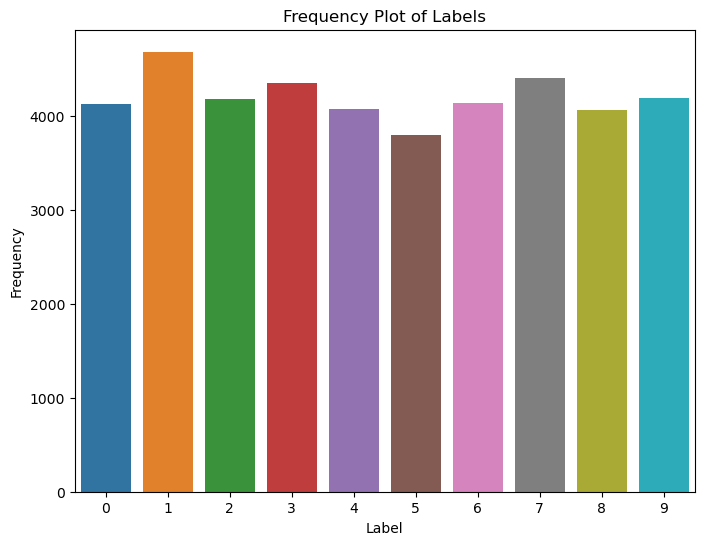

In [45]:
# Check distribution of labels in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=train_data['label'].value_counts().index, y=train_data['label'].value_counts().values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Labels')
plt.show()

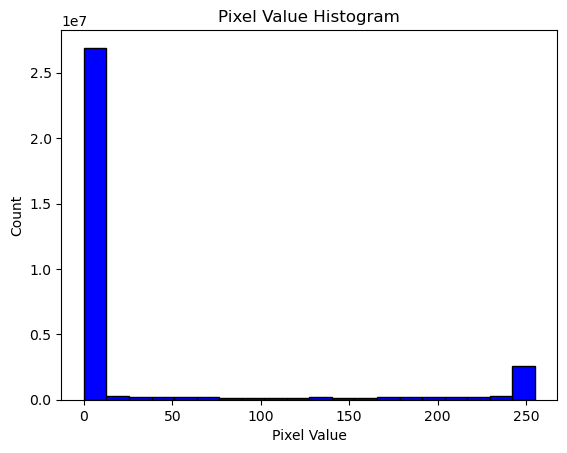

In [46]:
# Visualize the distribution of pixel values
plt.hist(X_train.values.flatten(), bins=20, color='blue', edgecolor='black')
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

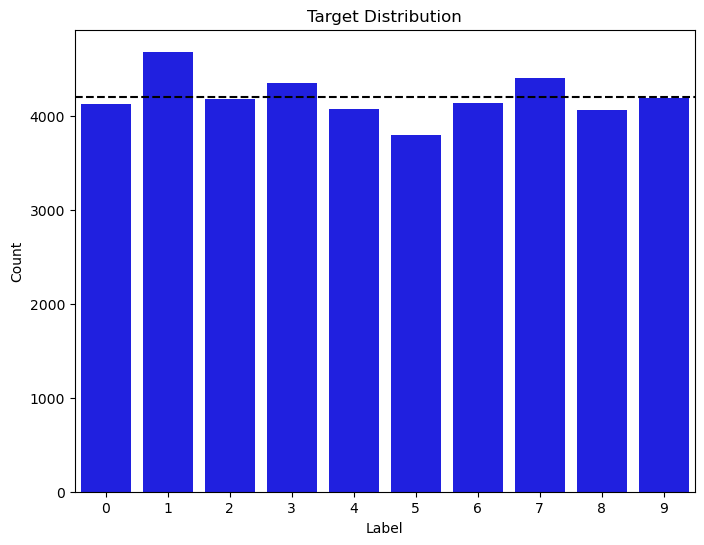

In [47]:
# Check if the target distribution is balanced
plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train, color='blue')
plt.title('Target Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.axhline(y=len(train_data) / 10, color='black', linestyle='--')
plt.show()

In [48]:
# Reshape data for CNN
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [49]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

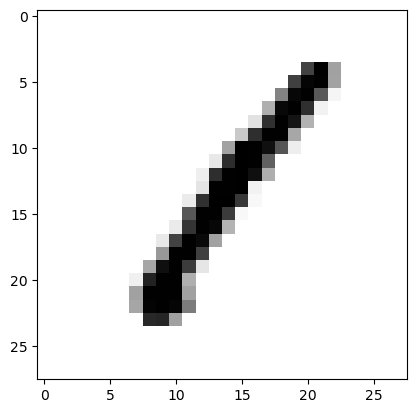

In [50]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

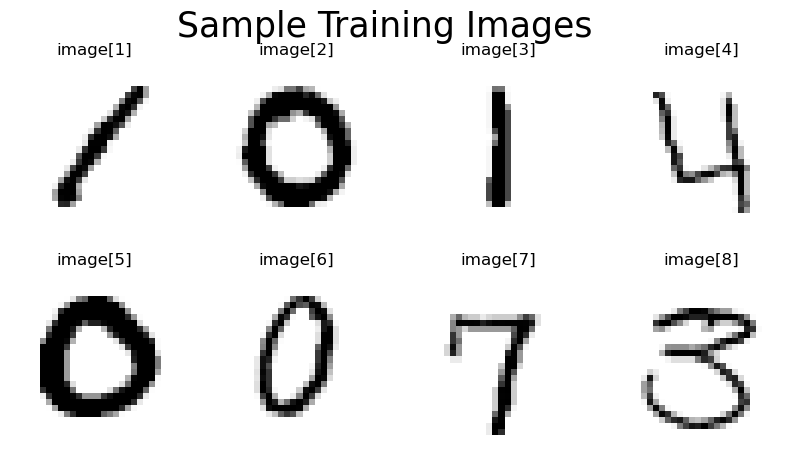

In [51]:
# Visualizing a sample of training images in a grid layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
axes = axes.flatten()

for i in range(8):
    axes[i].imshow(X_train[i], cmap = plt.cm.binary)
    axes[i].set_title(f"image{[i+1]}")
    axes[i].axis("off")

plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

In [52]:
# Split the dataset into training and testing sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [53]:
# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [54]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.compat.v1.losses.sparse_softmax_cross_entropy,
              metrics=['accuracy'])

In [55]:
# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [56]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [57]:
# Train the model
history = model.fit(train_datagen.flow(X_train, Y_train, batch_size=128),
                    epochs=10,
                    validation_data=(X_validation, Y_validation))

Epoch 1/10
263/263 [==============================] - 17s 61ms/step - loss: 1.8014 - accuracy: 0.6729 - val_loss: 1.6097 - val_accuracy: 0.8535
Epoch 2/10
263/263 [==============================] - 16s 59ms/step - loss: 1.5638 - accuracy: 0.9029 - val_loss: 1.4954 - val_accuracy: 0.9673
Epoch 3/10
263/263 [==============================] - 15s 59ms/step - loss: 1.5212 - accuracy: 0.9431 - val_loss: 1.4929 - val_accuracy: 0.9698
Epoch 4/10
263/263 [==============================] - 15s 56ms/step - loss: 1.5097 - accuracy: 0.9539 - val_loss: 1.4830 - val_accuracy: 0.9792
Epoch 5/10
263/263 [==============================] - 16s 60ms/step - loss: 1.5025 - accuracy: 0.9602 - val_loss: 1.4801 - val_accuracy: 0.9825
Epoch 6/10
263/263 [==============================] - 15s 58ms/step - loss: 1.4968 - accuracy: 0.9659 - val_loss: 1.4772 - val_accuracy: 0.9846
Epoch 7/10
263/263 [==============================] - 16s 60ms/step - loss: 1.4950 - accuracy: 0.9674 - val_loss: 1.4809 - val_accuracy:

In [58]:
# Evaluate the performance of the model on the validation set
validation_loss, validation_accuracy = model.evaluate(X_validation, Y_validation)
validation_accuracy_percentage = validation_accuracy * 100
print(f"Validation Accuracy: {validation_accuracy_percentage:.2f}%")

263/263 [==============================] - 1s 4ms/step - loss: 1.4780 - accuracy: 0.9831
Validation Accuracy: 98.31%


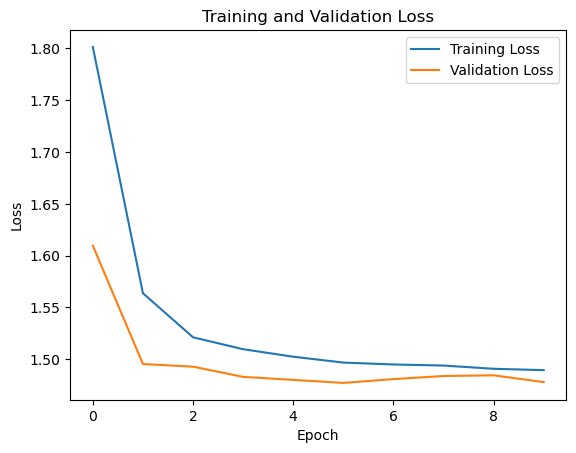

In [59]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

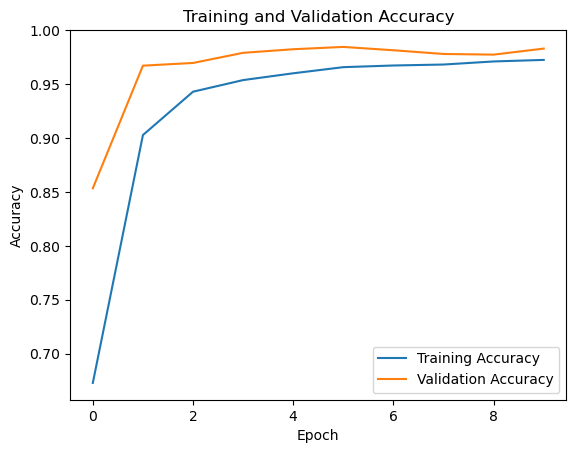

In [60]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [61]:
# Make predictions on the test set
Y_predicted = model.predict(X_test)
predicted_classes = np.argmax(Y_predicted, axis=1)

875/875 [==============================] - 3s 3ms/step


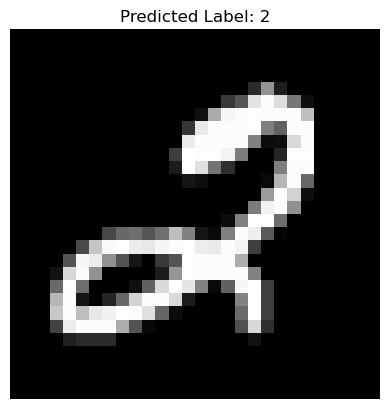

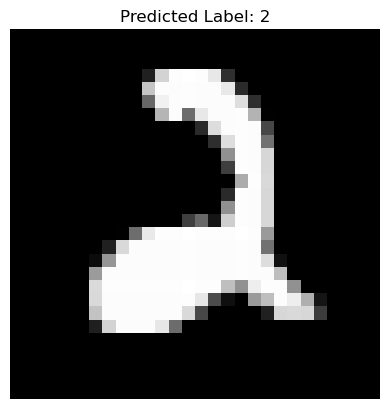

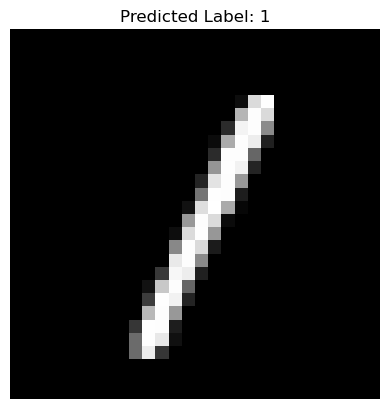

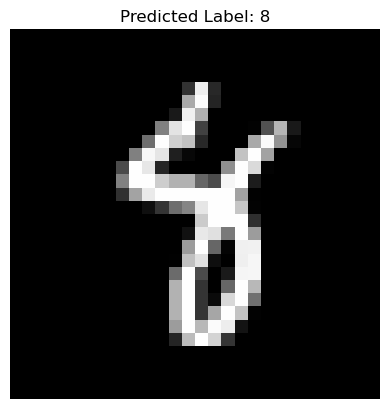

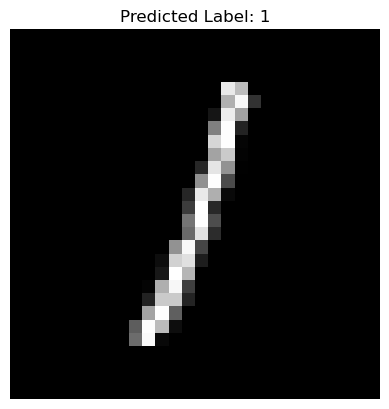

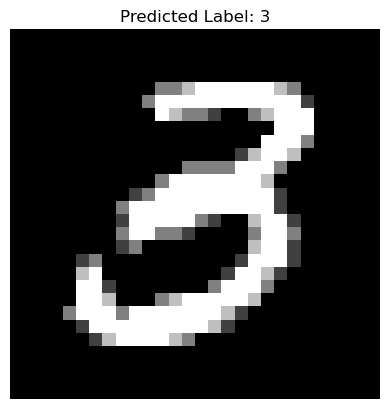

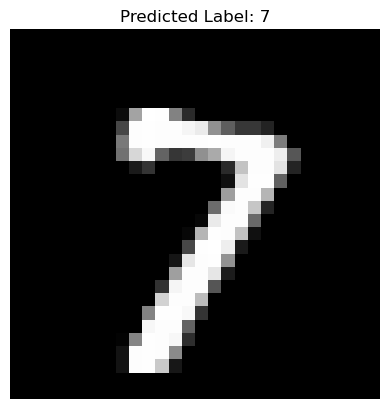

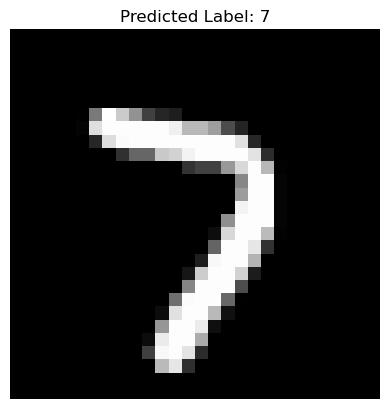

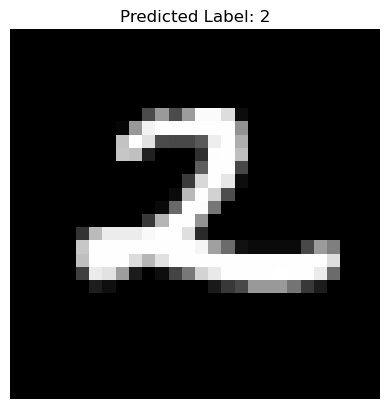

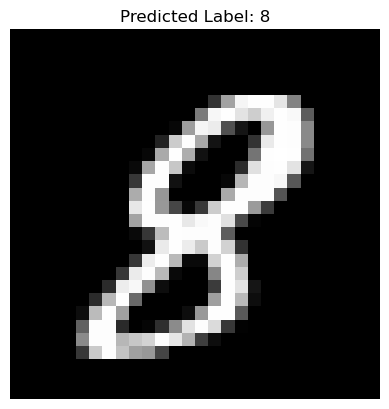

In [62]:
# Visualize random predictions
num_random_indices = 10
random_indices = np.random.choice(len(X_test), num_random_indices, replace=False)
for index in random_indices:
    image = X_test[index]
    predicted_label = predicted_classes[index]
    plt.figure()
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
